**Цель работы**
Анализ данных Национального обследования роста семьи (NSFG) для изучения характеристик беременности и родов.
**Основные задачи:**

Очистка и предварительная обработка данных

Анализ распределений ключевых переменных

Сравнение показателей для разных групп респондентов

Визуализация данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из HDF5-файла
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

**1. Исследование структуры данных**

In [2]:
# Размерность DataFrame (строки, столбцы)
print(nsfg.shape)

# Названия столбцов
print(nsfg.columns)

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


**2. Работа с отдельными переменными**

In [3]:
# Выбор данных о весе при рождении (в унциях)
ounces = nsfg['birthwgt_oz1']
print(ounces.head(5))  # Первые 5 значений

# Анализ переменной 'nbrnaliv' (число рожденных детей)
print(nsfg['nbrnaliv'].value_counts())

# Замена значения 8 на NaN (пропущенное значение)
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)
print(nsfg['nbrnaliv'].value_counts())  # Проверка замены

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64
nbrnaliv
1.0    6379
2.0     100
3.0       5
8.0       1
Name: count, dtype: int64
nbrnaliv
1.0    6379
2.0     100
3.0       5
Name: count, dtype: int64


<ipython-input-3-b8f7f1c669a9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)


**3. Анализ возраста**

In [4]:
# Описательные статистики для возраста при зачатии и беременности
print(nsfg['agecon'].describe())
print(nsfg['agepreg'].describe())

# Нормализация возраста
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Расчет длительности беременности
preg_length = agepreg - agecon
print(preg_length.describe())  # Статистики длительности

count    9358.000000
mean     2446.330199
std       579.392363
min       750.000000
25%      1983.000000
50%      2366.000000
75%      2850.000000
max      4350.000000
Name: agecon, dtype: float64
count    9109.000000
mean     2494.934570
std       578.099231
min       825.000000
25%      2041.000000
50%      2416.000000
75%      2900.000000
max      4350.000000
Name: agepreg, dtype: float64
count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


**4. Визуализация данных**

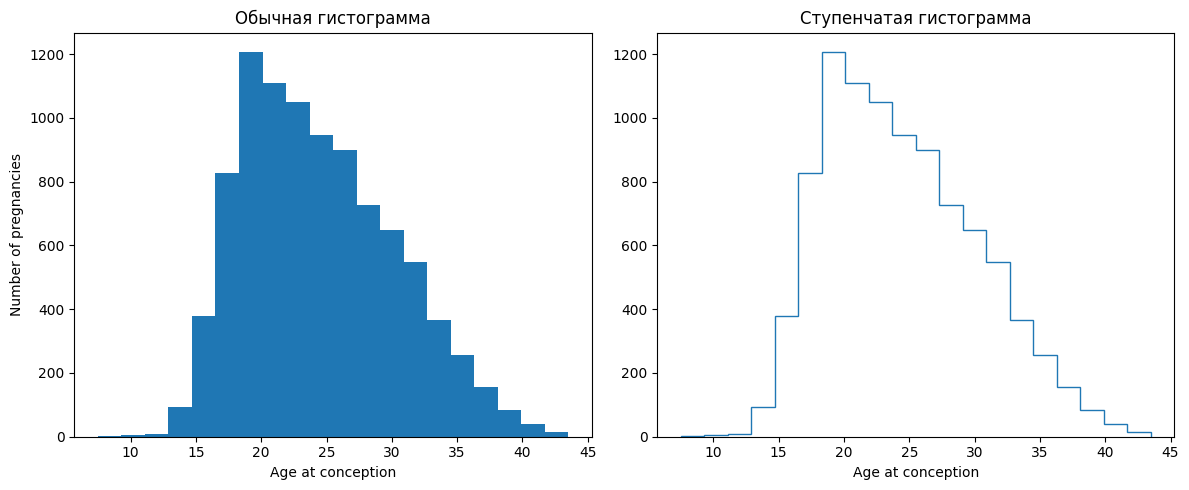

In [12]:
plt.figure(figsize=(12, 5))  # Общая фигура

# Гистограмма обычная
plt.subplot(1, 2, 1)
plt.hist(agecon, bins=20)
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')
plt.title('Обычная гистограмма')

# Гистограмма ступенчатая
plt.subplot(1, 2, 2)
plt.hist(agecon, bins=20, histtype='step')
plt.xlabel("Age at conception")
plt.title('Ступенчатая гистограмма')

plt.tight_layout()
plt.show()

**5. Взвешенная повторная выборка**

In [7]:
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Повторная выборка строк с весами"""
    weights = df[column].copy()
    weights /= sum(weights)  # Нормализация весов
    # Случайный выбор индексов с учетом весов
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    return df.loc[indices]  # Возврат новой выборки

# Применение взвешенной выборки
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

**6. Анализ веса при рождении**

In [8]:
# Очистка данных о весе (замена 98, 99 на NaN)
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Расчет общего веса в фунтах
birth_weight = pounds + ounces/16

# Выделение доношенных беременностей (≥37 недель)
full_term = nsfg['prglngth'] >= 37
full_term_weight = birth_weight[full_term]
print(full_term_weight.mean())  # Средний вес доношенных

7.4291532402434655


**7. Сравнение групп**

In [9]:
# Фильтр для одноплодных родов
single = nsfg['nbrnaliv'] == 1

# Средний вес для одноплодных доношенных
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Средний вес для многоплодных доношенных
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.436904440848616
Multiple full-term mean: 5.6328125
